# Intro

In this one I'm generating some reference data for 3D similarity approaches. The idea is inspired by [this blog post](https://greglandrum.github.io/rdkit-blog/posts/2021-05-18-fingerprint-thresholds1.html), where I figured out noise thresholds for similarity calculations with a bunch of 2D fingerprints. Here I do basically the same thing: calculating a number of different 3D similarity (or distance) metrics on random pairs of molecules in order to establish noise thresholds for those metrics.

I compare results from two different data sets for this:
1. 25000 random pairs of molecules with crystal structures from the LOBSTER data set. The [last](https://greglandrum.github.io/rdkit-blog/posts/2025-11-08-working-with-lobster-1.html) [three](https://greglandrum.github.io/rdkit-blog/posts/2025-11-16-working-with-lobster-2.html) [blog posts](https://greglandrum.github.io/rdkit-blog/posts/2025-11-23-working-with-lobster-3.html) have looked at LOBSTER. I used the crystal structures from the LOBSTER data set for these molecules.
2. 50000 random pairs of molecules from the ChEMBL set I used in the [fingerprint thresholds post](https://greglandrum.github.io/rdkit-blog/posts/2021-05-18-fingerprint-thresholds1.html). I used ETKDGv3 conformers for these molecules.

The first data set is considerably less diverse, the pairs are formed from only 3583 unique molecules, but the 3D structures are from crystals so I think it's worth considering (even though we know that ETKDG does generally produce reasonable structures). For cases where the values disagree, I think it's probably better to use the ChEMBL results since they come from a larger data set.

Here's the summary of the results.

## Alignment based approaches

Here some of the metrics are similarity based, where the thresholds are lower bounds, and some are distance based, where the thresholds are upper bounds. Rather than transform the distance into similarity, I think it's more useful to report the values that actually come from the RDKit function. 
If this turns out to be wrong, I will update the blog post.

For example, if you do a shape-based alignment of two molecules to each other and get a shape Tanimoto score of 0.80, the LOBSTER data would say that the value is larger than 95% of the random pairs while the ChEMBL data says it's larger (more significant) than 99% of the random pairs.
Similarly, if the shape-based alignment produces a shape Tanimoto distance of 0.30, both data sets would say that the distance is smaller (more significant) than 99% of the random pairs.



### LOBSTER Set

| metric | 70% | 80% | 90% | 95% | 99%| type |
|---------------------------|-------|-------|-------|-------|-------|-------|
| baseline_ShapeTanimoto	| >0.49 | >0.54 | >0.62 | >0.69 | >0.81 	| SIMILARITY |
| shape_align_ShapeTanimoto	| >0.62 | >0.66 | >0.71 | >0.76 | >0.85 	| SIMILARITY |
| baseline_TanimotoDist	| <0.61 | <0.57 | <0.52 | <0.48 | <0.39 	| DISTANCE |
| shape_align_TanimotoDist	| <0.53 | <0.50 | <0.46 | <0.42 | <0.34 	| DISTANCE |
| shape_align_noc_TanimotoDist	| <0.52 | <0.49 | <0.45 | <0.42 | <0.34 	| DISTANCE |
| o3a_align_TanimotoDist	| <0.58 | <0.55 | <0.51 | <0.46 | <0.36 	| DISTANCE |
| crippeno3a_align_TanimotoDist	| <0.59 | <0.56 | <0.51 | <0.47 | <0.37 	| DISTANCE |


### ChEMBL Set

| metric | 70% | 80% | 90% | 95% | 99%| type |
|---------------------------|-------|-------|-------|-------|-------|-------|
| baseline_ShapeTanimoto	| >0.44 | >0.48 | >0.54 | >0.59 | >0.69 	| SIMILARITY |
| shape_align_ShapeTanimoto	| >0.58 | >0.61 | >0.65 | >0.69 | >0.76 	| SIMILARITY |
| baseline_TanimotoDist	| <0.64 | <0.61 | <0.57 | <0.54 | <0.47 	| DISTANCE |
| shape_align_TanimotoDist	| <0.55 | <0.53 | <0.50 | <0.47 | <0.42 	| DISTANCE |
| shape_align_noc_TanimotoDist	| <0.55 | <0.53 | <0.50 | <0.47 | <0.41 	| DISTANCE |
| o3a_align_TanimotoDist	| <0.61 | <0.59 | <0.55 | <0.52 | <0.46 	| DISTANCE |
| crippeno3a_align_TanimotoDist	| <0.61 | <0.59 | <0.55 | <0.52 | <0.46 	| DISTANCE |

## Non-alignment based approaches

### LOBSTER Set

| metric | 70% | 80% | 90% | 95% | 99%| type |
|---------------------------|-------|-------|-------|-------|-------|-------|
| USR_score	| >0.66 | >0.71 | >0.76 | >0.80 | >0.87 	| SIMILARITY |
| noh_USR_score	| >0.66 | >0.71 | >0.76 | >0.80 | >0.86 	| SIMILARITY |
| AP3D_DiceSimilarity	| >0.49 | >0.54 | >0.60 | >0.63 | >0.70 	| SIMILARITY |
| noh_AP3D_DiceSimilarity	| >0.29 | >0.33 | >0.38 | >0.43 | >0.51 	| SIMILARITY |
| E3FP_DiceSimilarity	| >0.28 | >0.31 | >0.34 | >0.37 | >0.43 	| SIMILARITY |
| noh_E3FP_DiceSimilarity	| >0.23 | >0.26 | >0.29 | >0.32 | >0.38 	| SIMILARITY |


### ChEMBL Set

| metric | 70% | 80% | 90% | 95% | 99%| type |
|---------------------------|-------|-------|-------|-------|-------|-------|
|| USR_score	| >0.65 | >0.69 | >0.74 | >0.78 | >0.84 	| SIMILARITY |
| noh_USR_score	| >0.65 | >0.69 | >0.74 | >0.78 | >0.84 	| SIMILARITY |
| AP3D_DiceSimilarity	| >0.57 | >0.60 | >0.65 | >0.68 | >0.73 	| SIMILARITY |
| noh_AP3D_DiceSimilarity	| >0.34 | >0.37 | >0.42 | >0.45 | >0.51 	| SIMILARITY |
| E3FP_DiceSimilarity	| >0.30 | >0.33 | >0.35 | >0.38 | >0.42 	| SIMILARITY |
| noh_E3FP_DiceSimilarity	| >0.26 | >0.28 | >0.30 | >0.32 | >0.36 	| SIMILARITY |



In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True

from matplotlib import pyplot as plt
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '16'
%matplotlib inline

%load_ext sql
%config SqlMagic.feedback=0


In [2]:
import rdkit
print(rdkit.__version__)

2025.09.3


# Getting started

In [3]:
import lwreg
from lwreg import utils

Load our lwreg configuration from the database we created before:

In [4]:
config = utils.configure_from_database(dbname='lobster_112024',dbtype='postgresql')
lwreg.set_default_config(config)

config

{'dbname': 'lobster_112024',
 'dbtype': 'postgresql',
 'cacheConnection': True,
 'standardization': 'none',
 'removeHs': 1,
 'useTautomerHashv2': 0,
 'registerConformers': 1,
 'numConformerDigits': 3,
 'lwregSchema': ''}

# Random pairs from LOBSTER

Get a map from (nm,pdb) tuples to (molregno,confid,molblock):

In [5]:
d = %sql postgresql://localhost/lobster_112024 \
    select ligname,pdb,molregno,conf_id,molblock \
    from lobster_data.all_ligands join conformers using (molregno,conf_id);
ligs = {}
for nm,pdb,mrn,cid,mb in d:
    mol = Chem.MolFromMolBlock(mb,removeHs=False)
    mol_noh = Chem.MolFromMolBlock(mb)
    ligs[(mrn,cid)] = (nm,pdb,mb,mol,mol_noh)

Create a bunch of random pairs:

In [6]:
import random
random.seed(0xa100f)

ks = list(ligs.keys())
base = []
while len(base)<25000:
    t = ks[:]
    random.shuffle(t)
    base.extend(t)
tbase = base[:]
random.shuffle(tbase)
pairs = set((min(x,y),max(x,y)) for x,y in zip(base,tbase) if x!=y)
len(pairs)


25029

In [7]:
pairs = list(pairs)[:25000]
pairs[:5]

[((453, 453), (925, 925)),
 ((1574, 1574), (2733, 2733)),
 ((175, 175), (3247, 3247)),
 ((1719, 1719), (3118, 3118)),
 ((3054, 3054), (3458, 3458))]

## Shape-based alignment

Let's see what we get when we perform shape-based alignment using the crystal conformers.

Start by aligning the crystal conformers.

In [10]:
import gzip,pickle
res_accum = pickle.load(open('./results/3d_random_distances.pkl','rb'))
from rdkit.Chem import rdShapeAlign
from rdkit.Chem import rdShapeHelpers
from rdkit.Chem import rdMolTransforms

In [33]:
from collections import defaultdict
res_accum = defaultdict(list)

In [34]:
from rdkit.Chem import rdShapeAlign
from rdkit.Chem import rdShapeHelpers
from rdkit.Chem import rdMolTransforms

from tqdm import tqdm
for c1,c2 in tqdm(pairs):
    m1 = Chem.Mol(ligs[c1][3])
    m2 = Chem.Mol(ligs[c2][3])
    rdMolTransforms.CanonicalizeConformer(m1.GetConformer())
    rdMolTransforms.CanonicalizeConformer(m2.GetConformer())
    
    st,ct = rdShapeAlign.AlignMol(m1,m2,opt_param=0.5)
    res_accum['shape_align_ShapeTanimoto'].append(st)
    res_accum['shape_align_ColorTanimoto'].append(ct)
    res_accum['shape_align_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))

    rdMolTransforms.CanonicalizeConformer(m1.GetConformer())
    rdMolTransforms.CanonicalizeConformer(m2.GetConformer())
    st,ct = rdShapeAlign.AlignMol(m1,m2,opt_param=1.0,useColors=False)
    res_accum['shape_align_noc_ShapeTanimoto'].append(st)
    res_accum['shape_align_noc_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))
    



100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:47<00:00, 530.84it/s]


## Open3DAlign

What about an alternative 3D alignment algorithm? Let's try aligning with Paolo Tosco's [Open3DAlign](https://link.springer.com/article/10.1007/s10822-011-9462-9):

In [36]:
from rdkit.Chem import rdMolAlign

for c1,c2 in tqdm(pairs):
    m1 = Chem.Mol(ligs[c1][3])
    m2 = Chem.Mol(ligs[c2][3])
    
    try:
        o3a = rdMolAlign.GetO3A(m2,m1)
        rmsd = o3a.Align()
        score = o3a.Score()
        res_accum['o3a_align_rmsd'].append(rmsd)
        res_accum['o3a_align_scpre'].append(score)
        res_accum['o3a_align_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))
    except ValueError:
        pass
    



100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [02:06<00:00, 198.35it/s]


The RDKit has a variation on Open3DAlign that uses atomic contributions to the MolLogP value instead of MMFF94 atom types

In [37]:
from rdkit.Chem import rdMolAlign

for c1,c2 in tqdm(pairs):
    m1 = Chem.Mol(ligs[c1][3])
    m2 = Chem.Mol(ligs[c2][3])
    
    try:
        o3a = rdMolAlign.GetCrippenO3A(m2,m1)
        rmsd = o3a.Align()
        score = o3a.Score()
        res_accum['crippeno3a_align_rmsd'].append(rmsd)
        res_accum['crippeno3a_align_scpre'].append(score)
        res_accum['crippeno3a_align_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))
    except ValueError:
        pass


100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [01:08<00:00, 366.77it/s]


## Baseline: canonical alignment

Just put the molecules in their principle-axis frame

In [93]:
res_accum['baseline_TanimotoDist'] = []
from tqdm import tqdm
for c1,c2 in tqdm(pairs):
    m1 = Chem.Mol(ligs[c1][3])
    m2 = Chem.Mol(ligs[c2][3])
    rdMolTransforms.CanonicalizeConformer(m1.GetConformer())
    rdMolTransforms.CanonicalizeConformer(m2.GetConformer())
    
    res_accum['baseline_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))


100%|██████████████████████████████████████████████████████████████████████| 25000/25000 [00:07<00:00, 3483.93it/s]


## Baseline: tanimoto shape score in the canonical alignment

In the v2025.09.3 RDKit release (released the day before I wrote this post), Dave Cosgrove added a function allowing two molecules to be scored using the Pubchem shape alignment code without doing the alignment first. This gives a score that is directly comparable to what you get when you do an alignment.

In [13]:
res_accum['baseline_ShapeTanimoto'] = []
from tqdm import tqdm
for c1,c2 in tqdm(pairs):
    m1 = Chem.Mol(ligs[c1][3])
    m2 = Chem.Mol(ligs[c2][3])
    rdMolTransforms.CanonicalizeConformer(m1.GetConformer())
    rdMolTransforms.CanonicalizeConformer(m2.GetConformer())
    opts = rdShapeAlign.ShapeInputOptions()
    res_accum['baseline_ShapeTanimoto'].append(rdShapeAlign.ScoreMol(m1,m2,opts,opts))

100%|██████████████████████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4227.54it/s]


In [17]:
import pickle
pickle.dump(res_accum,open('./results/3d_random_distances.pkl','wb+'))

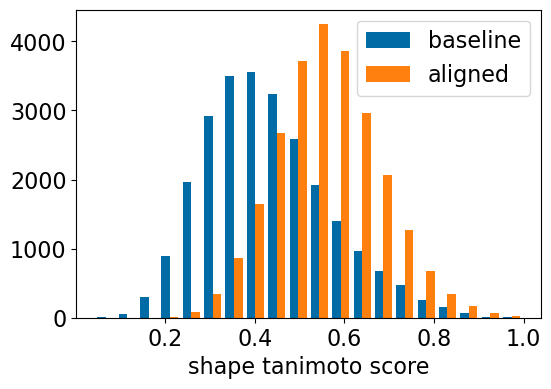

In [18]:
plt.figure(figsize=(6,4))
plt.hist([[x[0] for x in res_accum['baseline_ShapeTanimoto']],res_accum['shape_align_ShapeTanimoto']],
         bins=20,label=['baseline','aligned'])
plt.xlabel('shape tanimoto score');
plt.legend();

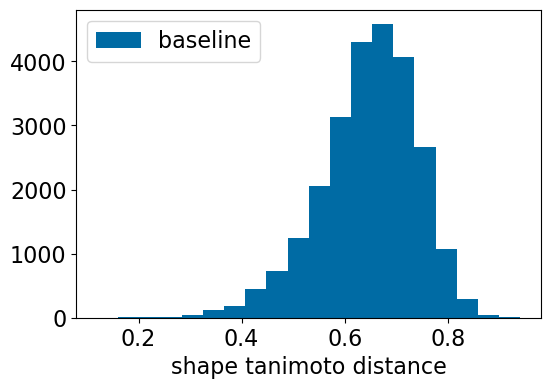

In [95]:
plt.figure(figsize=(6,4))
plt.hist([res_accum['baseline_TanimotoDist'],],bins=20,label=['baseline',])
plt.xlabel('shape tanimoto distance');
plt.legend();

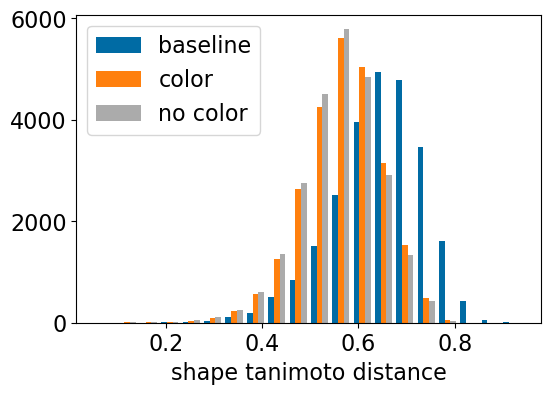

In [96]:
plt.figure(figsize=(6,4))
plt.hist([res_accum['baseline_TanimotoDist'],res_accum['shape_align_TanimotoDist'],res_accum['shape_align_noc_TanimotoDist']],bins=20,label=['baseline','color','no color'])
plt.xlabel('shape tanimoto distance');
plt.legend();

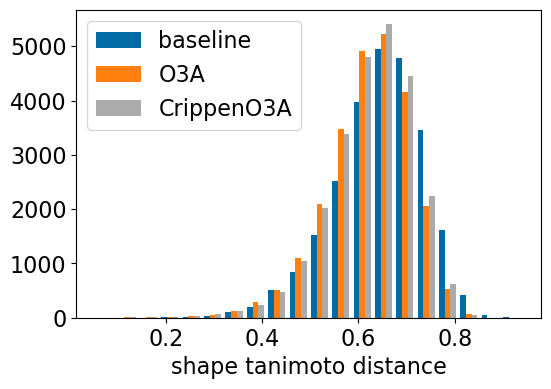

In [97]:
plt.figure(figsize=(6,4))
plt.hist([res_accum['baseline_TanimotoDist'],res_accum['o3a_align_TanimotoDist'],res_accum['crippeno3a_align_TanimotoDist']],
         bins=20,label=['baseline','O3A','CrippenO3A'])
plt.xlabel('shape tanimoto distance');
plt.legend();

## Non-alignment methods

In [79]:
from rdkit.Chem import rdMolDescriptors
res_accum['USR_score'] = []
res_accum['noh_USR_score'] = []


for c1,c2 in tqdm(pairs):
    m1 = Chem.Mol(ligs[c1][3])
    m2 = Chem.Mol(ligs[c2][3])
    usr1 = rdMolDescriptors.GetUSR(m1)
    usr2 = rdMolDescriptors.GetUSR(m2)
    res_accum['USR_score'].append(rdMolDescriptors.GetUSRScore(usr1,usr2))
    
    m1 = Chem.Mol(ligs[c1][4])
    m2 = Chem.Mol(ligs[c2][4])
    usr1 = rdMolDescriptors.GetUSR(m1)
    usr2 = rdMolDescriptors.GetUSR(m2)
    res_accum['noh_USR_score'].append(rdMolDescriptors.GetUSRScore(usr1,usr2))
   


100%|██████████████████████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6754.96it/s]


In [80]:
fpg = rdFingerprintGenerator.GetAtomPairGenerator(use2D=False)
res_accum['AP3D_DiceSimilarity'] = []
res_accum['noh_AP3D_DiceSimilarity'] = []
for c1,c2 in tqdm(pairs):
    m1 = Chem.Mol(ligs[c1][3])
    m2 = Chem.Mol(ligs[c2][3])
    if not m1.GetNumConformers() or not m2.GetNumConformers():
        continue
    fp1 = fpg.GetCountFingerprint(m1)
    fp2 = fpg.GetCountFingerprint(m2)
    res_accum['AP3D_DiceSimilarity'].append(DataStructs.DiceSimilarity(fp1,fp2))

    m1 = Chem.Mol(ligs[c1][4])
    m2 = Chem.Mol(ligs[c2][4])
    fp1 = fpg.GetCountFingerprint(m1)
    fp2 = fpg.GetCountFingerprint(m2)
    res_accum['noh_AP3D_DiceSimilarity'].append(DataStructs.DiceSimilarity(fp1,fp2))


100%|██████████████████████████████████████████████████████████████████████| 25000/25000 [00:21<00:00, 1148.58it/s]


In [83]:
import logging
from e3fp.pipeline import fprints_from_mol
logging.disable(logging.INFO)

def get_fp(m):
    fp = fprints_from_mol(m,fprint_params={'counts':True})[0]
    rdkfp = DataStructs.ULongSparseIntVect(2**32)
    for k,v in fp.counts.items():
        rdkfp[int(k)] = v 
    return rdkfp

res_accum['E3FP_DiceSimilarity'] = []
res_accum['noh_E3FP_DiceSimilarity'] = []
for c1,c2 in tqdm(pairs):
    m1 = Chem.Mol(ligs[c1][3])
    m2 = Chem.Mol(ligs[c2][3])
    fp1 = get_fp(m1)
    fp2 = get_fp(m2)
    res_accum['E3FP_DiceSimilarity'].append(DataStructs.DiceSimilarity(fp1,fp2))
    m1 = Chem.Mol(ligs[c1][4])
    m2 = Chem.Mol(ligs[c2][4])
    fp1 = get_fp(m1)
    fp2 = get_fp(m2)
    res_accum['noh_E3FP_DiceSimilarity'].append(DataStructs.DiceSimilarity(fp1,fp2))


100%|████████████████████████████████████████████████████████████████████████| 25000/25000 [39:01<00:00, 10.68it/s]


In [84]:
import pickle
pickle.dump(res_accum,open('./results/3d_random_distances.pkl','wb+'))

# Random ChEMBL molecules

Using the pairs of random molecules I used for the [fingerprint thresholds post](https://greglandrum.github.io/rdkit-blog/posts/2021-05-18-fingerprint-thresholds1.html) and other blog posts about similarity.

In [61]:
import gzip
ind = [x.split(b'\t') for x in gzip.open('../data/chembl35_50K.mfp0.pairs.txt.gz')]
ms1 = []
ms2 = []
for i,row in enumerate(ind):
    m1 = Chem.AddHs(Chem.MolFromSmiles(row[1]))
    ms1.append(m1)
    m2 = Chem.AddHs(Chem.MolFromSmiles(row[3]))
    ms2.append(m2)

In [62]:
random.seed(23)
random.shuffle(ms2)

In [63]:
len(ms1)

50000

In [53]:
try:
    import ipyparallel as ipp
    rc = ipp.Client()
    dview = rc[:]
    dview.execute('from rdkit import Chem')
    dview.execute('from rdkit.Chem import rdDistGeom')
    dview.execute('from rdkit.Chem import rdMolAlign')
    dview.execute('from rdkit.Chem import rdMolTransforms')
    dview.execute('from rdkit.Chem import rdShapeHelpers')
    dview.execute('from rdkit.Chem import rdShapeAlign')
    dview.execute('from rdkit.Chem import rdFingerprintGenerator')
    dview.execute('from rdkit import DataStructs')
    dview.execute('from e3fp.pipeline import fprints_from_mol')
    dview.execute('import logging;logging.disable(logging.INFO)')
except:
    print("could not use ipyparallel")
    dview = None

Generate one ETKDGv3 conformer per molecule:

In [64]:
from rdkit.Chem import rdDistGeom
ms1c = dview.map_sync(lambda x:(rdDistGeom.EmbedMolecule(x,randomSeed=0xf00d),x), ms1)
ms2c = dview.map_sync(lambda x:(rdDistGeom.EmbedMolecule(x,randomSeed=0xf00d),x), ms2)

In [65]:
import pickle
import gzip
pickle.dump((ms1c,ms2c),gzip.open('./results/random_pairs_confs.pkl.gz','wb+'))

In [ ]:
res_accum2 = defaultdict(list)

for m1,m2 in tqdm(zip(ms1c,ms2c)):
    m1 = Chem.Mol(m1[1])
    m2 = Chem.Mol(m2[1])
    if not m1.GetNumConformers() or not m2.GetNumConformers():
        continue
    rdMolTransforms.CanonicalizeConformer(m1.GetConformer())
    rdMolTransforms.CanonicalizeConformer(m2.GetConformer())

    res_accum2['baseline_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))

    st,ct = rdShapeAlign.AlignMol(m1,m2,opt_param=0.5)
    res_accum2['shape_align_ShapeTanimoto'].append(st)
    res_accum2['shape_align_ColorTanimoto'].append(ct)
    res_accum2['shape_align_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))

    rdMolTransforms.CanonicalizeConformer(m1.GetConformer())
    rdMolTransforms.CanonicalizeConformer(m2.GetConformer())
    st,ct = rdShapeAlign.AlignMol(m1,m2,opt_param=1.0,useColors=False)
    res_accum2['shape_align_noc_ShapeTanimoto'].append(st)
    res_accum2['shape_align_noc_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))


In [30]:
res_accum2 = pickle.load(open('./results/3d_random_distances2.pkl','rb'))

In [31]:
res_accum2['baseline_ShapeTanimoto'] = []
for m1,m2 in tqdm(zip(ms1c,ms2c)):
    m1 = Chem.Mol(m1[1])
    m2 = Chem.Mol(m2[1])
    if not m1.GetNumConformers() or not m2.GetNumConformers():
        continue
    rdMolTransforms.CanonicalizeConformer(m1.GetConformer())
    rdMolTransforms.CanonicalizeConformer(m2.GetConformer())
    opts = rdShapeAlign.ShapeInputOptions()
    res_accum2['baseline_ShapeTanimoto'].append(rdShapeAlign.ScoreMol(m1,m2,opts,opts))

50000it [00:12, 3934.62it/s]


In [70]:
for m1,m2 in tqdm(zip(ms1c,ms2c)):
    m1 = Chem.Mol(m1[1])
    m2 = Chem.Mol(m2[1])
    if not m1.GetNumConformers() or not m2.GetNumConformers():
        continue
    try:
        o3a = rdMolAlign.GetO3A(m2,m1)
        rmsd = o3a.Align()
        score = o3a.Score()
        res_accum2['o3a_align_rmsd'].append(rmsd)
        res_accum2['o3a_align_scpre'].append(score)
        res_accum2['o3a_align_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))
    except ValueError:
        pass

50000it [07:06, 117.30it/s]


In [71]:
for m1,m2 in tqdm(zip(ms1c,ms2c)):
    m1 = Chem.Mol(m1[1])
    m2 = Chem.Mol(m2[1])
    if not m1.GetNumConformers() or not m2.GetNumConformers():
        continue
    
    try:
        o3a = rdMolAlign.GetCrippenO3A(m2,m1)
        rmsd = o3a.Align()
        score = o3a.Score()
        res_accum2['crippeno3a_align_rmsd'].append(rmsd)
        res_accum2['crippeno3a_align_scpre'].append(score)
        res_accum2['crippeno3a_align_TanimotoDist'].append(rdShapeHelpers.ShapeTanimotoDist(m1,m2))   
    except ValueError:
        pass


50000it [03:43, 223.62it/s]


In [85]:
from rdkit.Chem import rdMolDescriptors

res_accum2['USR_score'] = []
res_accum2['noh_USR_score'] = []
for m1,m2 in tqdm(zip(ms1c,ms2c)):
    m1 = Chem.Mol(m1[1])
    m2 = Chem.Mol(m2[1])
    if not m1.GetNumConformers() or not m2.GetNumConformers():
        continue
    
    usr1 = rdMolDescriptors.GetUSR(m1)
    usr2 = rdMolDescriptors.GetUSR(m2)
    res_accum2['USR_score'].append(rdMolDescriptors.GetUSRScore(usr1,usr2))
    
    m1 = Chem.RemoveHs(m1)
    m2 = Chem.RemoveHs(m2)
    usr1 = rdMolDescriptors.GetUSR(m1)
    usr2 = rdMolDescriptors.GetUSR(m2)
    res_accum2['noh_USR_score'].append(rdMolDescriptors.GetUSRScore(usr1,usr2))


50000it [00:18, 2744.31it/s]


In [86]:
fpg = rdFingerprintGenerator.GetAtomPairGenerator(use2D=False)

res_accum2['AP3D_DiceSimilarity'] = []
res_accum2['noh_AP3D_DiceSimilarity'] = []
for m1,m2 in tqdm(zip(ms1c,ms2c)):
    m1 = Chem.Mol(m1[1])
    m2 = Chem.Mol(m2[1])
    if not m1.GetNumConformers() or not m2.GetNumConformers():
        continue
    fp1 = fpg.GetCountFingerprint(m1)
    fp2 = fpg.GetCountFingerprint(m2)
    res_accum2['AP3D_DiceSimilarity'].append(DataStructs.DiceSimilarity(fp1,fp2))

    m1 = Chem.RemoveHs(m1)
    m2 = Chem.RemoveHs(m2)
    fp1 = fpg.GetCountFingerprint(m1)
    fp2 = fpg.GetCountFingerprint(m2)
    res_accum2['noh_AP3D_DiceSimilarity'].append(DataStructs.DiceSimilarity(fp1,fp2))


50000it [01:12, 688.09it/s]


In [87]:
res_accum2['E3FP_DiceSimilarity'] = []
res_accum2['noh_E3FP_DiceSimilarity'] = []

for m1,m2 in tqdm(zip(ms1c,ms2c)):
    m1 = Chem.Mol(m1[1])
    m2 = Chem.Mol(m2[1])
    if not m1.GetNumConformers() or not m2.GetNumConformers():
        continue
    fp1 = get_fp(m1)
    fp2 = get_fp(m2)
    res_accum2['E3FP_DiceSimilarity'].append(DataStructs.DiceSimilarity(fp1,fp2))

    m1 = Chem.RemoveHs(m1)
    m2 = Chem.RemoveHs(m2)
    fp1 = get_fp(m1)
    fp2 = get_fp(m2)
    res_accum2['noh_E3FP_DiceSimilarity'].append(DataStructs.DiceSimilarity(fp1,fp2))


50000it [1:49:13,  7.63it/s]


In [88]:
import pickle
pickle.dump(res_accum2,open('./results/3d_random_distances2.pkl','wb+'))

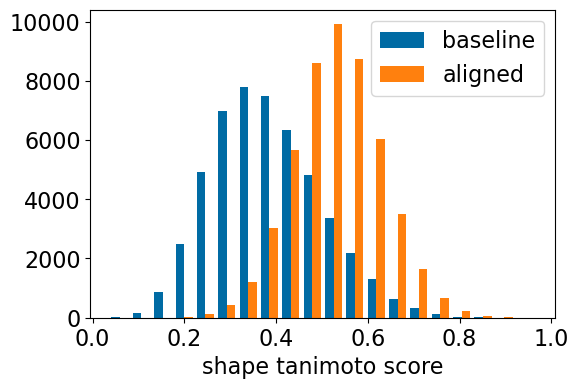

In [26]:
plt.figure(figsize=(6,4))
plt.hist([[x[0] for x in res_accum2['baseline_ShapeTanimoto']],res_accum2['shape_align_ShapeTanimoto']],
         bins=20,label=['baseline','aligned'])
plt.xlabel('shape tanimoto score');
plt.legend();

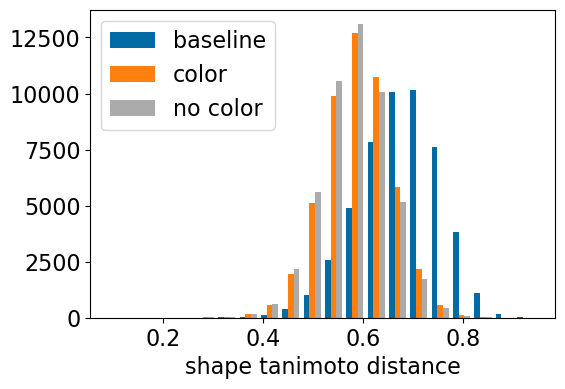

In [99]:
plt.figure(figsize=(6,4))
plt.hist([res_accum2['baseline_TanimotoDist'],res_accum2['shape_align_TanimotoDist'],res_accum2['shape_align_noc_TanimotoDist']],bins=20,label=['baseline','color','no color'])
plt.xlabel('shape tanimoto distance');
plt.legend();

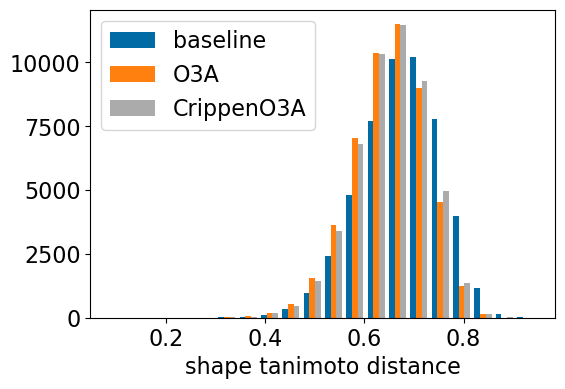

In [98]:
plt.figure(figsize=(6,4))
plt.hist([res_accum2['baseline_TanimotoDist'],res_accum2['o3a_align_TanimotoDist'],res_accum2['crippeno3a_align_TanimotoDist']],
         bins=20,label=['baseline','O3A','CrippenO3A'])
plt.xlabel('shape tanimoto distance');
plt.legend();

In [58]:
res_accum2.keys()

dict_keys(['baseline_TanimotoDist', 'shape_align_ShapeTanimoto', 'shape_align_ColorTanimoto', 'shape_align_TanimotoDist', 'shape_align_noc_ShapeTanimoto', 'shape_align_noc_TanimotoDist', 'o3a_align_rmsd', 'o3a_align_scpre', 'o3a_align_TanimotoDist', 'crippeno3a_align_rmsd', 'crippeno3a_align_scpre', 'crippeno3a_align_TanimotoDist', 'USR_score', 'noh_USR_score', 'AP3D_DiceSimilarity', 'noh_AP3D_DiceSimilarity', 'E3FP_DiceSimilarity', 'noh_E3FP_DiceSimilarity', 'baseline_ShapeTanimoto'])

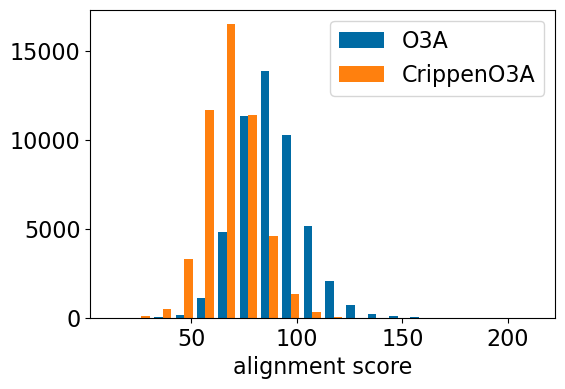

In [59]:
plt.figure(figsize=(6,4))
plt.hist([res_accum2['o3a_align_scpre'],res_accum2['crippeno3a_align_scpre'],],
         bins=20,label=['O3A','CrippenO3A'])
plt.xlabel('alignment score');
plt.legend();

# Summary stats

In [28]:
import numpy as np

In [57]:
print('****   LOBSTER Set ****')
print('| baseline_ShapeTanimoto\t|',
      ' | '.join([">%.2f"%x for x in np.quantile([x[0] for x in res_accum['baseline_ShapeTanimoto']],[0.7, 0.8, 0.9,0.95,0.99])]),
     '\t| SIMILARITY |')
print('| shape_align_ShapeTanimoto\t|',
      ' | '.join([">%.2f"%x for x in np.quantile([x for x in res_accum['shape_align_ShapeTanimoto']],[0.7, 0.8, 0.9,0.95,0.99])]),
     '\t| SIMILARITY |')
for k in ['baseline_TanimotoDist','shape_align_TanimotoDist','shape_align_noc_TanimotoDist',
         'o3a_align_TanimotoDist','crippeno3a_align_TanimotoDist']:
    print(f'| {k}\t|',' | '.join(["<%.2f"%x for x in np.quantile(res_accum[k],[0.3,0.2,0.1,0.05,0.01])]),
         '\t| DISTANCE |')
print('****   ChEMBL Set ****')
print('| baseline_ShapeTanimoto\t|',
      ' | '.join([">%.2f"%x for x in np.quantile([x[0] for x in res_accum2['baseline_ShapeTanimoto']],[0.7, 0.8, 0.9,0.95,0.99])]),
     '\t| SIMILARITY |')
print('| shape_align_ShapeTanimoto\t|',
      ' | '.join([">%.2f"%x for x in np.quantile([x for x in res_accum2['shape_align_ShapeTanimoto']],[0.7, 0.8, 0.9,0.95,0.99])]),
     '\t| SIMILARITY |')
for k in ['baseline_TanimotoDist','shape_align_TanimotoDist','shape_align_noc_TanimotoDist',
         'o3a_align_TanimotoDist','crippeno3a_align_TanimotoDist']:
    print(f'| {k}\t|',' | '.join(["<%.2f"%x for x in np.quantile(res_accum2[k],[0.3,0.2,0.1,0.05,0.01])]),
         '\t| DISTANCE |')

print('\n\n\n ------------------   No alignment  --------------------')
print('****   LOBSTER Set ****')
for k in ['USR_score','noh_USR_score','AP3D_DiceSimilarity','noh_AP3D_DiceSimilarity',
          'E3FP_DiceSimilarity','noh_E3FP_DiceSimilarity']:
    print(f'| {k}\t|',' | '.join([">%.2f"%x for x in np.quantile(res_accum[k],[0.7, 0.8, 0.9,0.95,0.99])]),
         '\t| SIMILARITY |')
    
print('****   ChEMBL Set ****')
for k in ['USR_score','noh_USR_score','AP3D_DiceSimilarity','noh_AP3D_DiceSimilarity',
          'E3FP_DiceSimilarity','noh_E3FP_DiceSimilarity']:
    print(f'| {k}\t|',' | '.join([">%.2f"%x for x in np.quantile(res_accum2[k],[0.7, 0.8, 0.9,0.95,0.99])]),
         '\t| SIMILARITY |')
    
    
    

****   LOBSTER Set ****
| baseline_ShapeTanimoto	| >0.49 | >0.54 | >0.62 | >0.69 | >0.81 	| SIMILARITY |
| shape_align_ShapeTanimoto	| >0.62 | >0.66 | >0.71 | >0.76 | >0.85 	| SIMILARITY |
| baseline_TanimotoDist	| <0.61 | <0.57 | <0.52 | <0.48 | <0.39 	| DISTANCE |
| shape_align_TanimotoDist	| <0.53 | <0.50 | <0.46 | <0.42 | <0.34 	| DISTANCE |
| shape_align_noc_TanimotoDist	| <0.52 | <0.49 | <0.45 | <0.42 | <0.34 	| DISTANCE |
| o3a_align_TanimotoDist	| <0.58 | <0.55 | <0.51 | <0.46 | <0.36 	| DISTANCE |
| crippeno3a_align_TanimotoDist	| <0.59 | <0.56 | <0.51 | <0.47 | <0.37 	| DISTANCE |
****   ChEMBL Set ****
| baseline_ShapeTanimoto	| >0.44 | >0.48 | >0.54 | >0.59 | >0.69 	| SIMILARITY |
| shape_align_ShapeTanimoto	| >0.58 | >0.61 | >0.65 | >0.69 | >0.76 	| SIMILARITY |
| baseline_TanimotoDist	| <0.64 | <0.61 | <0.57 | <0.54 | <0.47 	| DISTANCE |
| shape_align_TanimotoDist	| <0.55 | <0.53 | <0.50 | <0.47 | <0.42 	| DISTANCE |
| shape_align_noc_TanimotoDist	| <0.55 | <0.53 | <0.50 